In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf
from skrf import Frequency, Network
from IPython.display import Image, display

In [7]:
path="../Sonnet_files/Qubit/"

# Coupler

import the GDSII design of the coupler and silumate it on Sonnet with the name "Coupler"

In [3]:
coupler=rf.Network("Coupler.s3p")

FileNotFoundError: [Errno 2] No such file or directory: 'Coupler.s3p'

Plot the $S_{ij}$ parameters of the coupler.

- port 1 is connected to coupler_T
- port 2 is connected to coupler_Qubit
- port 3 is connected to the shorted end of the quarter wave resonator

In [4]:
Image(filename=path+"Transmon_coupler.png")

FileNotFoundError: [Errno 2] No such file or directory: '../Sonnet_files/Transmon_coupler.png'

#  Tee connexion

import the GDSII design of the T-connexion and silumate it on Sonnet with the name "T_connexion"

In [5]:
T_conn=rf.Network("T_connexion.s3p")

FileNotFoundError: [Errno 2] No such file or directory: 'T_connexion.s3p'

Plot the $S_{ij}$ parameters of the coupler

- port 1 is connected to T_feed
- port 2 is connected to T_Purcell
- port 3 is connected to coupler_T

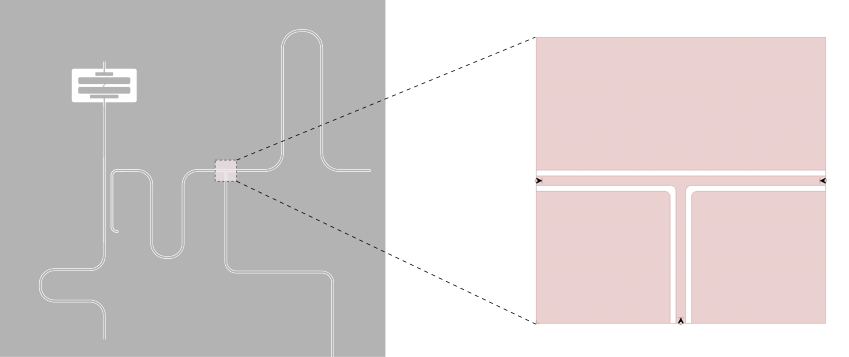

In [8]:
Image(filename=path+"Transmon_T.png")

#  Capacitively coupled Qubit 

import the GDSII design of the junctionand capacitor silumate the Qubit state $\ket{g}$ and  $\ket{e}$ by using two different inductances. Save the file as "Junction.som" and export two s1p files corresponding to the ground and excited states respectively.

In [26]:
Qubit_g=rf.Network("Junction_param1.s1p")
Qubit_e=rf.Network("Junction_param2.s1p")

- Qubit_g in the ground state is the transmon at a given frequency $f_g$ ($L_g=17.75 \, nH$)
- Qubit_e is the transmon at a given frequency $f_e$ ($L_e=19.68 \, nH$)

In [27]:
from IPython.display import Image

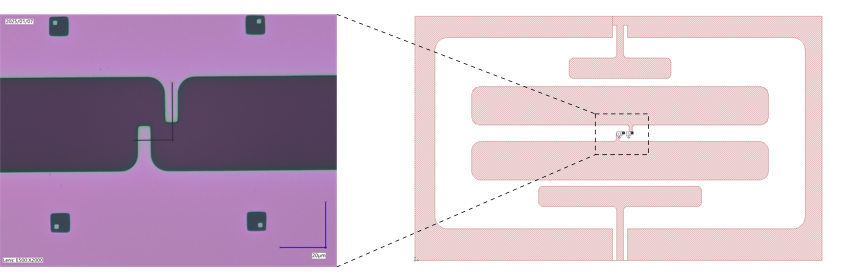

In [10]:
Image(filename=path+"Transmon_junction.png")

## Qubit board: coupler + filter + T+ CPW

Frequency range

In [54]:
L=[coupler.frequency,T_conn.frequency,Qubit_g.frequency,Qubit_e.frequency]
Len=[len(coupler.frequency.f),len(T_conn.frequency.f),len(Qubit_g.frequency.f),len(Qubit_e.frequency.f)]
M=max(Len)
ind=Len.index(M)

freq=L[ind]
f=freq.f
Nf=len(f)

In [55]:
L

[4.0-7.0 GHz, 60001 pts,
 4.0-7.0 GHz, 60001 pts,
 4.0-7.0 GHz, 60001 pts,
 4.0-7.0 GHz, 60001 pts]

adjust the frequency range between sp files and simulated CPW lines

In [56]:
coupler=coupler.interpolate(freq) 
T_conn=T_conn.interpolate(freq) 
Qubit_g=Qubit_g.interpolate(freq) 
Qubit_e=Qubit_e.interpolate(freq)

Define all the length to create the CPW obbject

In [57]:
L_coupler_Qubit = 786e-6 # Length of the line between Qubit and coupler (red line)
L_coupler_res_end = 2887e-6 # Length of the line between coupler and shorted line (green line)
L_T_Purcell = 3810e-6 # Length of Purcell filter (purple line)
L_coupler_T = 3289e-6# Length of the CPW from T-connexion to coupler (blue line)
L_T_feed = 3838e-6  # Length of CPW from T-connexion to measurement port (yellow line)
c=3e8/np.sqrt(9.96)  # Group velocity (m/s) measured from 

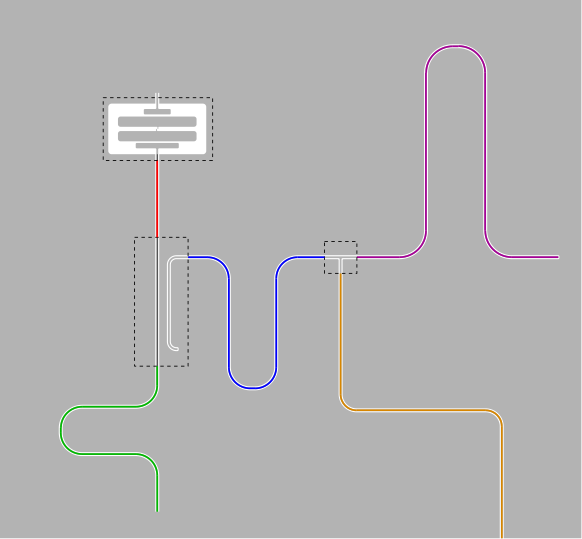

In [11]:
Image(filename=path+"Transmon_colored_lines.png")

In [59]:
print(T_conn)
print(coupler)
print(Qubit_g)
print(Qubit_e)

3-Port Network: 'T_connexion',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j 50.+0.j 50.+0.j]
3-Port Network: 'Coupler',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j 50.+0.j 50.+0.j]
1-Port Network: 'Junction_param1',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j]
1-Port Network: 'Junction_param2',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j]


In [60]:
s_coupler_Qubit = np.zeros((Nf, 2, 2), dtype=complex)
s_coupler_Qubit[:, 0, 1] = np.exp(-1j * 2 * np.pi * f / c * L_coupler_Qubit)
s_coupler_Qubit[:, 1, 0] = np.exp(-1j * 2 * np.pi * f / c * L_coupler_Qubit)
CPW_coupler_Qubit = Network(frequency=freq, s=s_coupler_Qubit, z0=50, name='CPW coupler_Qubit')

In [61]:
print(CPW_coupler_Qubit)

2-Port Network: 'CPW coupler_Qubit',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j 50.+0.j]


In [62]:
s_coupler_res_end = np.zeros((Nf, 2, 2), dtype=complex)
s_coupler_res_end[:, 0, 1] = np.exp(-1j * 2 * np.pi * f / c * L_coupler_res_end)
s_coupler_res_end[:, 1, 0] = np.exp(-1j * 2 * np.pi * f / c * L_coupler_res_end)
CPW_coupler_res_end = Network(frequency=freq, s=s_coupler_res_end, z0=50, name='CPW_coupler_res_end')

In [63]:
s_T_Purcell = np.zeros((Nf, 2, 2), dtype=complex)
s_T_Purcell[:, 0, 1] = np.exp(-1j * 2 * np.pi * f / c * L_T_Purcell)
s_T_Purcell[:, 1, 0] = np.exp(-1j * 2 * np.pi * f / c * L_T_Purcell)
CPW_T_Purcell = Network(frequency=freq, s=s_T_Purcell, z0=50, name='CPW T_Purcell')

In [64]:
s_coupler_T = np.zeros((Nf, 2, 2), dtype=complex)
s_coupler_T[:, 0, 1] = np.exp(-1j * 2 * np.pi * f / c * L_coupler_T)
s_coupler_T[:, 1, 0] = np.exp(-1j * 2 * np.pi * f / c * L_coupler_T)
CPW_coupler_T = Network(frequency=freq, s=s_coupler_T, z0=50, name='CPW coupler_T')


In [65]:
s_T_feed  = np.zeros((Nf, 2, 2), dtype=complex)
s_T_feed [:, 0, 1] = np.exp(-1j * 2 * np.pi * f / c * L_T_feed )
s_T_feed [:, 1, 0] = np.exp(-1j * 2 * np.pi * f / c * L_T_feed )
CPW_T_feed = Network(frequency=freq, s=s_T_feed, z0=50, name='CPW T_feed')

In [66]:
print(T_conn)
print(coupler)
print(Qubit_g)
print(Qubit_e)
print(CPW_coupler_Qubit)
print(CPW_coupler_res_end)
print(CPW_T_Purcell)
print(CPW_coupler_T)
print(CPW_T_feed)


3-Port Network: 'T_connexion',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j 50.+0.j 50.+0.j]
3-Port Network: 'Coupler',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j 50.+0.j 50.+0.j]
1-Port Network: 'Junction_param1',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j]
1-Port Network: 'Junction_param2',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j]
2-Port Network: 'CPW coupler_Qubit',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j 50.+0.j]
2-Port Network: 'CPW_coupler_res_end',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j 50.+0.j]
2-Port Network: 'CPW T_Purcell',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j 50.+0.j]
2-Port Network: 'CPW coupler_T',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j 50.+0.j]
2-Port Network: 'CPW T_feed',  4.0-7.0 GHz, 60001 pts, z0=[50.+0.j 50.+0.j]


## Circuit

-  port 1 is connected to coupler_T: (coupler,0)
-  port 2 is connected to coupler_Qubit: (coupler,1)
-  port 3 is connected to the shorted end of the quarter wave resonator: (coupler,2)

- port 1 is connected to T_feed: (T_conn,0)
-  port 2 is connected to T_Purcell: (T_conn,1)
-  port 3 is connected to coupler_T: (T_conn,2)

In [67]:
port1 = rf.Circuit.Port(frequency=freq, name='port1', z0=50)
port2 = rf.Circuit.Port(frequency=freq, name='port2', z0=50)
ground0 = rf.Circuit.Ground(freq, name='GND0')
line = rf.media.DefinedGammaZ0(frequency=freq, z0=50)
Open1 =line.resistor(1e9, name='open1') # end of the Purcell filter

- port 1 is connected to coupler_T: (coupler,0) 
- port 2 is connected to coupler_Qubit: (coupler,1) 
- port 3 is connected to the shorted end of the quarter wave resonator: (coupler,2)

- port 1 is connected to T_feed: (T_conn,0) 
- port 2 is connected to T_Purcell: (T_conn,1)
- port 3 is connected to coupler_T: (T_conn,2)

DUT is connected on coupler port connected on the qubit which can be opened, qubit in ground state $|g\rangle$ or $|e\rangle$

In [68]:
DUT=[]
DUT.append(Qubit_g) # ground state (Junction_param2.n1p)
DUT.append(Qubit_e) # excited state (Junction_param3.n1p)

In [69]:
connexion=[]
for k in range(2):
    connexion.append([[(port1, 0), (CPW_T_feed, 0)],
                  [(CPW_T_feed, 1), (T_conn,0)],
                  [(T_conn,1),(CPW_T_Purcell,0)],
                  [(CPW_T_Purcell, 1),(Open1,0)],
                  [(T_conn,2),(CPW_coupler_T,0)],
                  [(CPW_coupler_T,1),(coupler,0)],
                  [(coupler,1),(CPW_coupler_Qubit,0)],
                  [(CPW_coupler_Qubit,1),(DUT[k],0)],
                  [(coupler,2),(CPW_coupler_res_end,0)],
                  [(CPW_coupler_res_end,1),(ground0,0)]
                 ])
resulting_Circuit=[]

<Figure size 640x480 with 0 Axes>

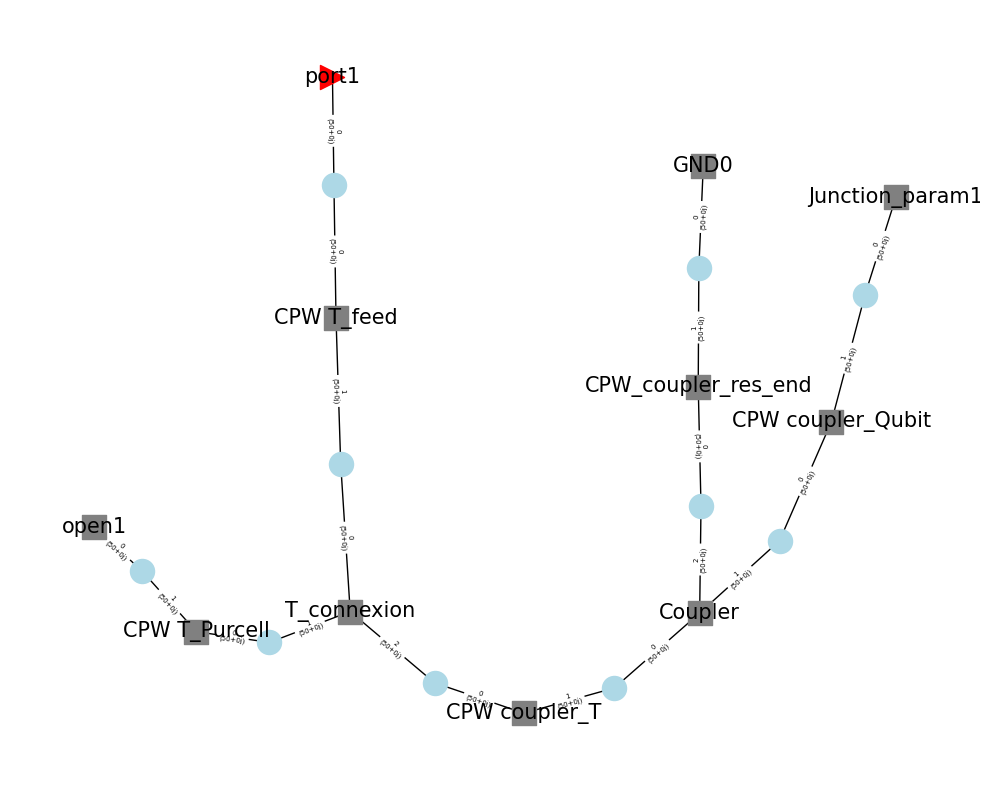

In [70]:
for k in range(2):
    resulting_Circuit.append(rf.Circuit(connexion[k]))
plt.figure()
resulting_Circuit[0].plot_graph(network_labels=True, network_fontsize=15,
               port_labels=True, port_fontsize=15,
              edge_labels=True, edge_fontsize=5)
plt.show()

<Figure size 640x480 with 0 Axes>

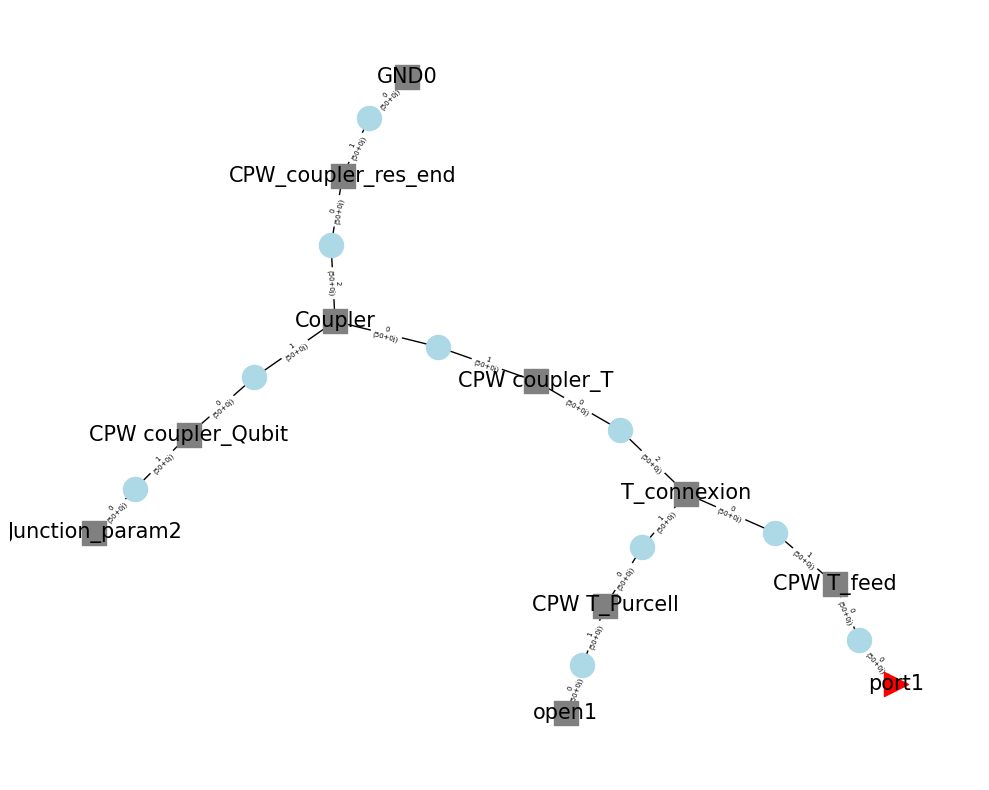

In [71]:
plt.figure()
resulting_Circuit[1].plot_graph(network_labels=True, network_fontsize=15,
               port_labels=True, port_fontsize=15,
              edge_labels=True, edge_fontsize=5)
plt.show()

We plot the angle of the refexion $S_{11}$ for the 3 different DUT

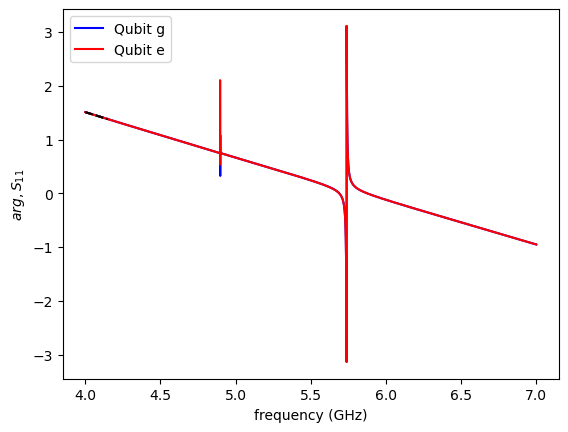

<Figure size 640x480 with 0 Axes>

In [72]:
S11_raw=[]
S11_cal=[]
label_DUT= ['Qubit g','Qubit e']
plt.figure()
color_lines=['b','r']
for k in range(2):
    S11_raw.append(resulting_Circuit[k].s[:,0,0])
    plt.plot(1e-9*f,np.angle(S11_raw[k]), label=label_DUT[k],color=color_lines[k])
    plt.plot(1e-9*f[0:3000],np.angle(S11_raw[k][0:3000]),'--k', linewidth=1.5)
    plt.legend(loc="upper left")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("$arg,  S_{11}$")
    p=np.polyfit(f[0:3000],np.unwrap(np.angle(resulting_Circuit[k].s[0:3000,0,0])),1) #propagation length
    S11_cal.append(S11_raw[k]*np.exp(-1j*p[0]*f))
plt.show()    
plt.savefig('S11_dB_Transmon_raw.png')

We calibrate the propagation along the lines

In [ ]:
plt.figure()
for k in [0,1]:
    plt.plot(1e-9*f,np.unwrap(np.angle(S11_cal[k])), label=label_DUT[k],color=color_lines[k])
    plt.legend(loc="lower left")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("$arg,  S_{11}$")
    plt.xlim(4,7)
    plt.ylim(-2.5*np.pi,0)
    plt.savefig(path+'Arg_S11_qubit.svg')
plt.show()
plt.savefig('S11_dB_Transmon.png')


In [ ]:
plt.figure()
for k in [0,1]:
    plt.plot(1e-9*f,np.unwrap(np.angle(S11_cal[k])), label=label_DUT[k],color=color_lines[k])
    plt.legend(loc="lower left")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("$arg,  S_{11}$")
    plt.xlim(4.9,4.915)
    plt.ylim(-2.2,-0.6)
    plt.savefig(path+'Arg_S11_qubit_zoom.svg')
    plt.plot([4.902, 4.902], [-2.2,-0.6], linestyle='--', color='black', linewidth=0.5)
    plt.plot([4.910, 4.910], [-2.2,-0.6], linestyle='--', color='black', linewidth=0.5)
plt.show()
plt.savefig('S11_dB_Transmon_zoom.svg')


# Effect of the Purcell filter on the Qubit

In [ ]:
connexion_Purcell=[]

connexion_Purcell.append([[(port1, 0), (CPW_T_feed, 0)],
                  [(CPW_T_feed, 1), (T_conn,0)],
                  [(T_conn,1),(CPW_T_Purcell,0)],
                  [(CPW_T_Purcell, 1),(Open1,0)],
                  [(T_conn,2),(CPW_coupler_T,0)],
                  [(CPW_coupler_T,1),(coupler,0)],
                  [(coupler,1),(CPW_coupler_Qubit,0)],
                  [(CPW_coupler_Qubit,1),(port2,0)],
                  [(coupler,2),(CPW_coupler_res_end,0)],
                  [(CPW_coupler_res_end,1),(ground0,0)]
                 ])
resulting_Circuit_Purcell=[]

<Figure size 640x480 with 0 Axes>

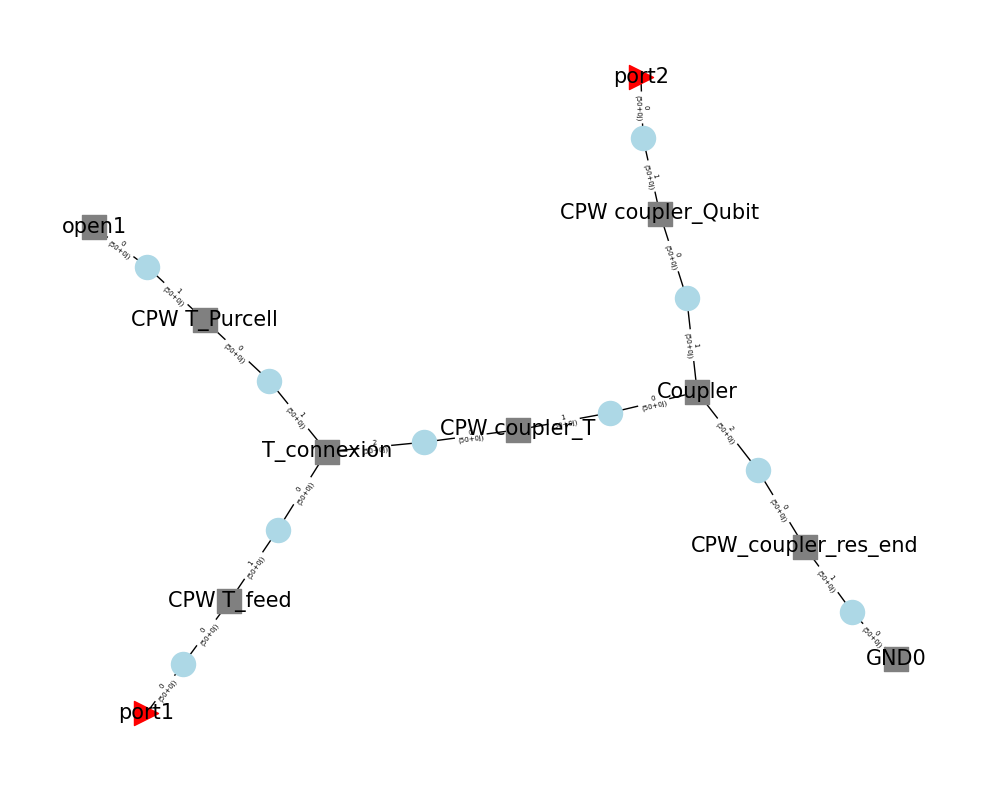

In [115]:
resulting_Circuit_Purcell.append(rf.Circuit(connexion_Purcell[0]))
resulting_Circuit_Purcell[0].port_indexes
plt.figure()
resulting_Circuit_Purcell[0].plot_graph(network_labels=True, network_fontsize=15,
               port_labels=True, port_fontsize=15,
              edge_labels=True, edge_fontsize=5)
plt.show()

In [116]:
plt.show()
plt.savefig('connection_Purcell.svg')

<Figure size 640x480 with 0 Axes>

We look for the port indexes in the network beacause we have more than 1 port

In [117]:
resulting_Circuit_Purcell[0].port_indexes

[0, 15]

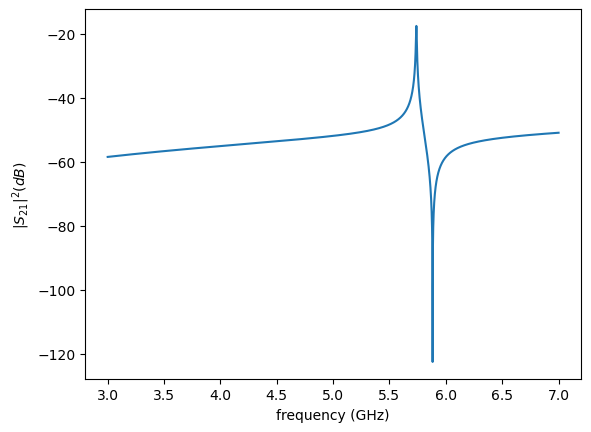

<Figure size 640x480 with 0 Axes>

In [120]:
S21_Purcell=[]
S21_Purcell.append(resulting_Circuit_Purcell[0].s[:,15,0])
plt.figure()
plt.plot(1e-9*f,20*np.log10(np.abs(S21_Purcell[0])))
plt.xlabel("frequency (GHz)")
plt.ylabel("$|S_{21}|^2 (dB)$")
plt.show()
plt.savefig('S21_Purcell.svg')